<a href="https://colab.research.google.com/github/Azimoj/CNN/blob/main/Week_9_Modeling_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/faizulislam19095/a-detailed-introduction-to-nlp

https://neptune.ai/blog/saving-trained-model-in-python

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00


In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
# importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from tensorflow import keras

%pylab inline
#to see full text:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from warnings import filterwarnings
filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import re, string, unicodedata
from string import punctuation
import contractions
from collections import Counter

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WCS/W9/SMSSpamCollection', sep='\t', header=None, names=['Label', 'Text'])

In [ ]:
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [ ]:
print(f'Number of objects in the dataset: {df.shape[0]}')

label_type = list(df['Label'].unique())
print(f'Types of labels in the dataset: {label_type}')

# ham: 0 , spam : 1
df.replace('ham', 0, inplace=True)
df.replace('spam', 1, inplace=True)
df['Label'] = df['Label'].astype('int8')

Number of objects in the dataset: 5572
Types of labels in the dataset: ['ham', 'spam']


In [ ]:
df

,Label,Text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [ ]:
print("There are {} duplicated values in the dataset".format(df.duplicated().sum()))

There are 403 duplicated values in the dataset


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
grouped_target = df.groupby("Label").count()
grouped_target["Text"]

Label
0    4516
1     653
Name: Text, dtype: int64

In [ ]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [ ]:

groups = df.groupby(by='Label').count().Text
CNT_HAM = groups[0]
CNT_SPAM = groups[1]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Ham', 'Spam'],
    y=[CNT_HAM, CNT_SPAM],
    marker_color='indianred',
    width=[0.3, 0.3]))

fig.update_layout(title='Classes and their number in the dataset', title_x=0.5)

### **Data Cleaning**

In [ ]:
data=df.copy()

In [ ]:
# Convert uppercase letters to lowercase letters
data["Text"] = data["Text"].apply(lambda x: x.lower())

# contraction:  we shouldnt've -> we should not have.
data["Text"] = data["Text"].apply(lambda x: contractions.fix(x))

#Delete punctuation mark
data["Text"] = data["Text"].apply(lambda x: " ".join(re.sub(r'[^\w\s]', '', x) for x in x.split()))

# Delete numbers from texts
data["Text"] = data["Text"].apply(lambda x: " ".join(re.sub(r'[0-9]', '', x) for x in x.split()))

#Delete stopwords and punctuation
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

data["Text"] = data["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

# Lemmatization
data["Text"] = data["Text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Remove URLs
data["Text"] = data["Text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

# Remove words less than 3 letters long
data["Text"] = data["Text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [ ]:
data.head(n = 10)

,Label,Text
0,0,jurong point crazy available bugis great world buffet cine amore
1,0,joking
2,1,free entry wkly comp final tkts text receive entry questionstd ratetcs apply over
3,0,early already
4,0,think life around though
5,1,freemsg darling week word back would like still chgs send
6,0,even brother like speak treat like patent
7,0,request melle melle minnaminunginte nurungu vettam callertune caller press copy friend callertune
8,1,winner valued network customer selected receivea prize reward claim call claim code valid hour
9,1,mobile month entitled update latest colour mobile camera free call mobile update free


In [ ]:
pd.set_option('display.max_colwidth', None)
df.head(n = 10)

,Label,Text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
5,1,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"
6,0,Even my brother is not like to speak with me. They treat me like aids patent.
7,0,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,1,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,1,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [ ]:
corpus = []
for i in data.Text:
    for j in i.split():
        corpus.append(j.strip())

In [ ]:
counter = Counter(corpus)
common_words = counter.most_common(50)
dict(common_words)

{'call': 512,
 'know': 283,
 'ltgt': 254,
 'want': 247,
 'free': 245,
 'like': 236,
 'come': 231,
 'going': 230,
 'time': 224,
 'love': 221,
 'good': 220,
 'text': 197,
 'need': 179,
 'send': 166,
 'message': 159,
 'home': 153,
 'today': 152,
 'still': 147,
 'back': 146,
 'stop': 145,
 'think': 141,
 'take': 135,
 'tell': 132,
 'reply': 130,
 'mobile': 128,
 'phone': 124,
 'sorry': 122,
 'please': 121,
 'week': 118,
 'make': 117,
 'night': 114,
 'cannot': 113,
 'well': 111,
 'thing': 110,
 'tomorrow': 109,
 'give': 109,
 'much': 109,
 'would': 104,
 'great': 103,
 'hope': 102,
 'later': 99,
 'number': 99,
 'claim': 98,
 'happy': 96,
 'work': 93,
 'dear': 91,
 'already': 90,
 'friend': 90,
 'yeah': 86,
 'really': 84}

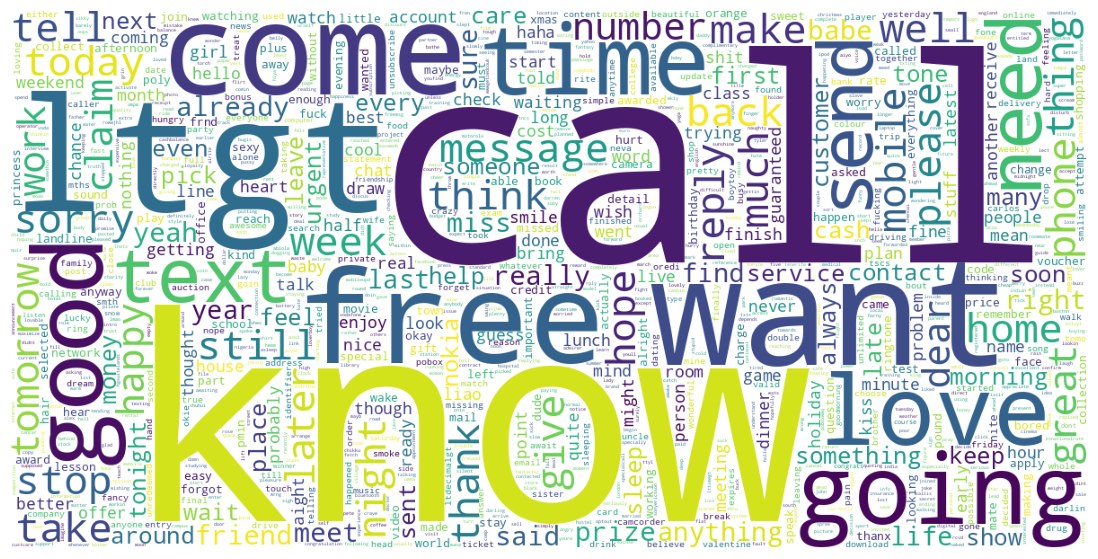

In [ ]:
text = " ".join(i for i in data.Text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show()

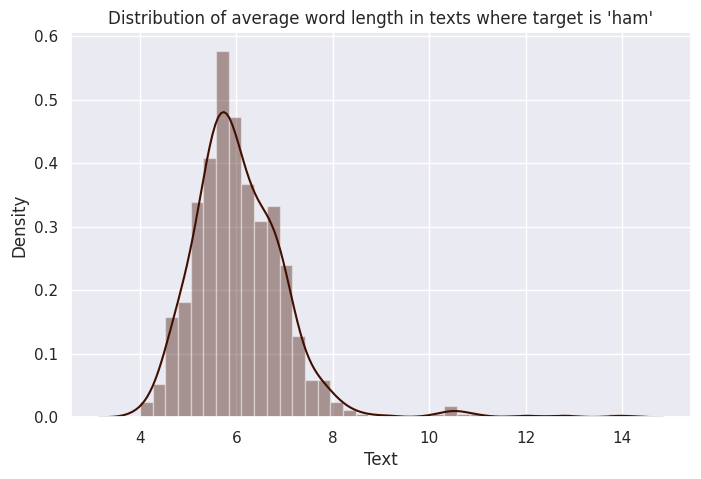

In [ ]:
fig,ax = plt.subplots(figsize = (8, 5))
text_words = data[data["Label"] == 1]["Text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'")
sns.set()

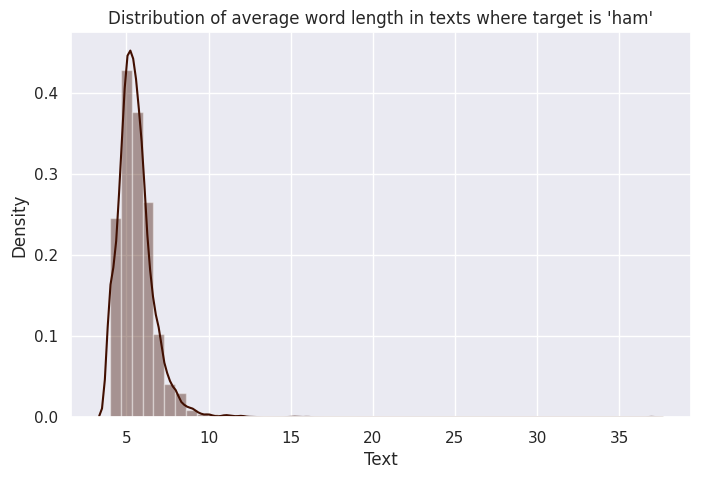

In [ ]:
fig,ax = plt.subplots(figsize = (8, 5))
text_words = data[data["Label"] == 0]["Text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'")
sns.set()

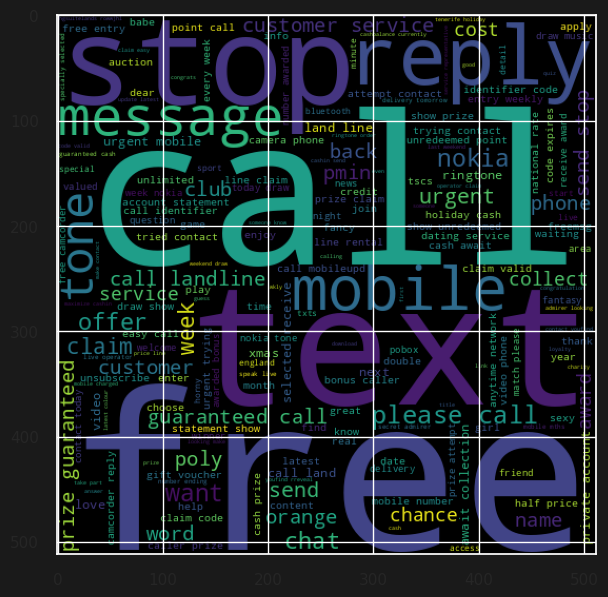

In [ ]:
from wordcloud import WordCloud

spam_words = ' '.join(list(data[data['Label'] == 1]['Text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (15, 7), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

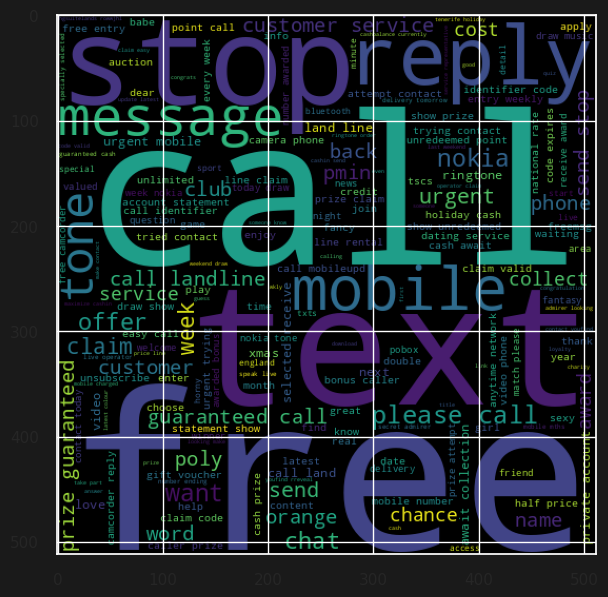

In [ ]:
ham_words = ' '.join(list(data[data['Label'] == 0]['Text']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (15, 7), facecolor = 'k')
plt.imshow(spam_wc)
plt.show()

### **Prepare data for machine learning models**

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.layers import Dense, BatchNormalization, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Accuracy
from keras import utils
from keras import callbacks
from sklearn.model_selection import train_test_split
from absl import logging
logging.set_verbosity(logging.ERROR)  # ignore notification

In [ ]:
X = data["Text"]
y = data["Label"]


In [ ]:
NUM_WORDS = 10000
MAX_TEXT_LEN = 100

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(data["Text"])  # training tokenizer


In [ ]:
# looking through the tokenizer dictionary
word_count = 15
keys = list(tokenizer.word_index.keys())[:word_count]
values = list(tokenizer.word_index.values())[:word_count]
list(zip(keys, values))

[('call', 1),
 ('know', 2),
 ('ltgt', 3),
 ('want', 4),
 ('free', 5),
 ('like', 6),
 ('come', 7),
 ('going', 8),
 ('time', 9),
 ('love', 10),
 ('good', 11),
 ('text', 12),
 ('need', 13),
 ('send', 14),
 ('message', 15)]

In [ ]:
# Transform each text in texts in a sequence of integers
sequences = tokenizer.texts_to_sequences(data["Text"])

# As a result, the text under the following index was converted to a vector
index = 2
print(data["Text"][index])
print(sequences[index])

X = pad_sequences(sequences, maxlen=MAX_TEXT_LEN)  # Standardization of the number of elements in a vector
y = data["Label"].copy()

free entry wkly comp final tkts text receive entry questionstd ratetcs apply over
[5, 280, 581, 582, 375, 1753, 12, 171, 280, 2631, 2632, 210, 2633]


In [ ]:

# Separation of data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print(f'Training sample size: {len(X_train)}')
print(f'Test sample size: {len(X_test)}')

Training sample size: 4135
Test sample size: 1034


## Deep learning model

https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/

**Creating and training a reccurent model (LSTM)**

LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

There are 4 possible outputs from LSTM layer
Important parameters are
units (dimensionality of the output space)
return_sequences
return_state
return_sequences and return_state parameters default values are FALSE
Combination of TRUE and FALSE values for return_sequences and return_state parameters generates different set of outputs
units (dimensionality of the output space) parameter defines how many numbers in the resulting tensor (representing a hidden or cell state value) will be

In [ ]:
# Sequential accepts a list containing the layers that define the architecture of the neural network.
# Data flows sequentially through each layer until it reaches the final output layer.
model = Sequential()

model.add(Embedding(6013, output_dim = 100,  trainable = False))

# units:	Positive integer, dimensionality of the output space.
# recurrent_activation	Activation function to use for the recurrent step. Default: sigmoid (sigmoid).If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).
model.add(LSTM(units = 128, return_sequences = True))

#model.add(LSTM(units = 16))

model.add(Dense(units = 32, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
print("Input layer output shape: ", model1.get_layer(index=0).output_shape)
print("LSTM layer output shape: ", model1.get_layer(index=1).output_shape)

Input layer output shape:  [(None, 4, 10)]
LSTM layer output shape:  [(None, 4, 16), (None, 16), (None, 16)]


In [ ]:
model = Sequential()
model.add(Embedding(NUM_WORDS, 64, input_length=MAX_TEXT_LEN))
model.add(LSTM(3))
model.add(LSTM(5, return_sequences=True, return_state))
model.add(LSTM(12))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#Stop training when a monitored metric has stopped improving.
callbacks = [
    callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=10, verbose=1),
    callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, min_delta=0.01, min_lr=1e-10, patience=4, verbose=1, mode='auto')
]

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_22 (LSTM)              (None, 100, 3)            816       
                                                                 
 lstm_23 (LSTM)              (None, 100, 5)            180       
                                                                 
 batch_normalization_6 (Bat  (None, 100, 5)            20        
 chNormalization)                                                
                                                                 
 lstm_24 (LSTM)              (None, 12)                864       
                                                                 
 dense_10 (Dense)            (None, 1)                 13        
                                                     

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=0.2,  callbacks=callbacks)

Epoch 1/10
67/67 [==============================] - 21s 192ms/step - loss: 0.4296 - accuracy: 0.8703 - val_loss: 0.3706 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 2/10
67/67 [==============================] - 11s 160ms/step - loss: 0.1072 - accuracy: 0.9813 - val_loss: 0.3252 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 3/10
67/67 [==============================] - 8s 114ms/step - loss: 0.0399 - accuracy: 0.9930 - val_loss: 0.2420 - val_accuracy: 0.9093 - lr: 0.0010
Epoch 4/10
67/67 [==============================] - 9s 133ms/step - loss: 0.0269 - accuracy: 0.9933 - val_loss: 0.2401 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 5/10
67/67 [==============================] - 8s 120ms/step - loss: 0.0178 - accuracy: 0.9976 - val_loss: 0.2301 - val_accuracy: 0.9335 - lr: 0.0010
Epoch 6/10
67/67 [==============================] - 8s 124ms/step - loss: 0.0136 - accuracy: 0.9982 - val_loss: 0.1716 - val_accuracy: 0.9553 - lr: 0.0010
Epoch 7/10
67/67 [==============================] - 9s 133ms/step - 

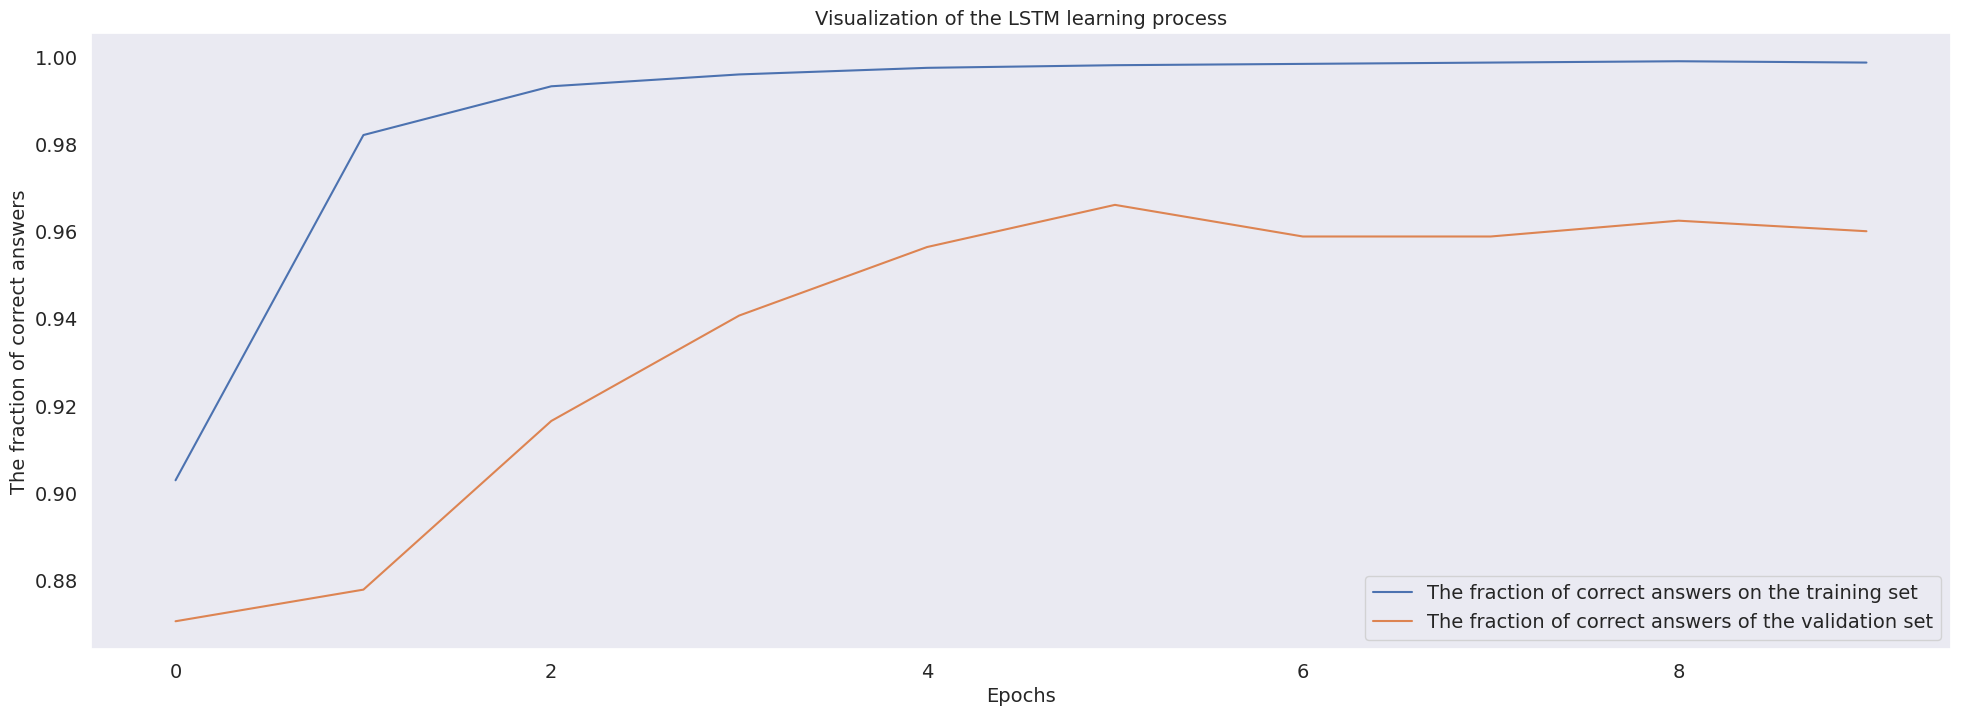

In [ ]:
plt.figure(figsize=(24, 8))
plt.title('Visualization of the LSTM learning process', fontsize=14)
plt.plot(history.history['Accuracy'], label='The fraction of correct answers on the training set')
plt.plot(history.history['val_Accuracy'], label='The fraction of correct answers of the validation set')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('The fraction of correct answers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.show()

**ReduceLROnPlateau**

Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

**Arguments:**

* monitor: quantity to be monitored.

* factor: factor by which the learning rate will be reduced. new_lr = lr *factor.

* patience: number of epochs with no improvement after which learning rate will be reduced.

* verbose: int. 0: quiet, 1: update messages.

* mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

* min_delta: threshold for measuring the new optimum, to only focus on significant changes.

* cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.

* and >min_lr: lower bound on the learning rate.




In [ ]:
from keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size = 64,
                    validation_data = (X_test, y_test),
                    epochs = 20,
                    callbacks = [lr_reduce])

Epoch 1/20
65/65 [==============================] - ETA: 0s - loss: 0.0053 - Accuracy: 0.9993

65/65 [==============================] - 9s 142ms/step - loss: 0.0053 - Accuracy: 0.9993 - val_loss: 0.1094 - val_Accuracy: 0.9681 - lr: 1.0000e-04
Epoch 2/20
65/65 [==============================] - ETA: 0s - loss: 0.0053 - Accuracy: 0.9990

65/65 [==============================] - 9s 142ms/step - loss: 0.0053 - Accuracy: 0.9990 - val_loss: 0.1089 - val_Accuracy: 0.9681 - lr: 1.0000e-04
Epoch 3/20
65/65 [==============================] - ETA: 0s - loss: 0.0052 - Accuracy: 0.9995

65/65 [==============================] - 9s 132ms/step - loss: 0.0052 - Accuracy: 0.9995 - val_loss: 0.1131 - val_Accuracy: 0.9662 - lr: 1.0000e-04
Epoch 4/20
65/65 [==============================] - ETA: 0s - loss: 0.0051 - Accuracy: 0.9993

65/65 [==============================] - 7s 109ms/step - loss: 0.0051 - Accuracy: 0.9993 - val_loss: 0.1151 - val_Accuracy: 0.9662 - lr: 1.0000e-04
Epoch 5/20
65/65 [==============================] - ETA: 0s - loss: 0.0051 - Accuracy: 0.9993

65/65 [==============================] - 9s 136ms/step - loss: 0.0051 - Accuracy: 0.9993 - val_loss: 0.1123 - val_Accuracy: 0.9662 - lr: 1.0000e-04
Epoch 6/20
65/65 [==============================] - ETA: 0s - loss: 0.0051 - Accuracy: 0.9990

65/65 [==============================] - 8s 124ms/step - loss: 0.0051 - Accuracy: 0.9990 - val_loss: 0.1130 - val_Accuracy: 0.9662 - lr: 1.0000e-04
Epoch 7/20
65/65 [==============================] - ETA: 0s - loss: 0.0048 - Accuracy: 0.9995

65/65 [==============================] - 10s 160ms/step - loss: 0.0048 - Accuracy: 0.9995 - val_loss: 0.1157 - val_Accuracy: 0.9662 - lr: 1.0000e-04
Epoch 8/20
65/65 [==============================] - ETA: 0s - loss: 0.0049 - Accuracy: 0.9993

65/65 [==============================] - 9s 141ms/step - loss: 0.0049 - Accuracy: 0.9993 - val_loss: 0.1150 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 9/20
65/65 [==============================] - ETA: 0s - loss: 0.0046 - Accuracy: 0.9993

65/65 [==============================] - 8s 117ms/step - loss: 0.0046 - Accuracy: 0.9993 - val_loss: 0.1158 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 10/20
65/65 [==============================] - ETA: 0s - loss: 0.0047 - Accuracy: 0.9995

65/65 [==============================] - 9s 142ms/step - loss: 0.0047 - Accuracy: 0.9995 - val_loss: 0.1151 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 11/20
65/65 [==============================] - ETA: 0s - loss: 0.0047 - Accuracy: 0.9990

65/65 [==============================] - 9s 138ms/step - loss: 0.0047 - Accuracy: 0.9990 - val_loss: 0.1144 - val_Accuracy: 0.9671 - lr: 1.0000e-04
Epoch 12/20
65/65 [==============================] - ETA: 0s - loss: 0.0045 - Accuracy: 0.9990

65/65 [==============================] - 7s 113ms/step - loss: 0.0045 - Accuracy: 0.9990 - val_loss: 0.1131 - val_Accuracy: 0.9681 - lr: 1.0000e-04
Epoch 13/20
65/65 [==============================] - ETA: 0s - loss: 0.0045 - Accuracy: 0.9990

65/65 [==============================] - 9s 136ms/step - loss: 0.0045 - Accuracy: 0.9990 - val_loss: 0.1184 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 14/20
65/65 [==============================] - ETA: 0s - loss: 0.0044 - Accuracy: 0.9990

65/65 [==============================] - 11s 166ms/step - loss: 0.0044 - Accuracy: 0.9990 - val_loss: 0.1174 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 15/20
65/65 [==============================] - ETA: 0s - loss: 0.0043 - Accuracy: 0.9993

65/65 [==============================] - 10s 160ms/step - loss: 0.0043 - Accuracy: 0.9993 - val_loss: 0.1154 - val_Accuracy: 0.9691 - lr: 1.0000e-04
Epoch 16/20
65/65 [==============================] - ETA: 0s - loss: 0.0043 - Accuracy: 0.9993

65/65 [==============================] - 9s 136ms/step - loss: 0.0043 - Accuracy: 0.9993 - val_loss: 0.1190 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 17/20
65/65 [==============================] - ETA: 0s - loss: 0.0044 - Accuracy: 0.9990

65/65 [==============================] - 8s 121ms/step - loss: 0.0044 - Accuracy: 0.9990 - val_loss: 0.1209 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 18/20
65/65 [==============================] - ETA: 0s - loss: 0.0042 - Accuracy: 0.9993

65/65 [==============================] - 8s 118ms/step - loss: 0.0042 - Accuracy: 0.9993 - val_loss: 0.1190 - val_Accuracy: 0.9681 - lr: 1.0000e-04
Epoch 19/20
65/65 [==============================] - ETA: 0s - loss: 0.0041 - Accuracy: 0.9990

65/65 [==============================] - 9s 135ms/step - loss: 0.0041 - Accuracy: 0.9990 - val_loss: 0.1232 - val_Accuracy: 0.9652 - lr: 1.0000e-04
Epoch 20/20
65/65 [==============================] - ETA: 0s - loss: 0.0039 - Accuracy: 0.9995

65/65 [==============================] - 8s 117ms/step - loss: 0.0039 - Accuracy: 0.9995 - val_loss: 0.1226 - val_Accuracy: 0.9662 - lr: 1.0000e-04


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

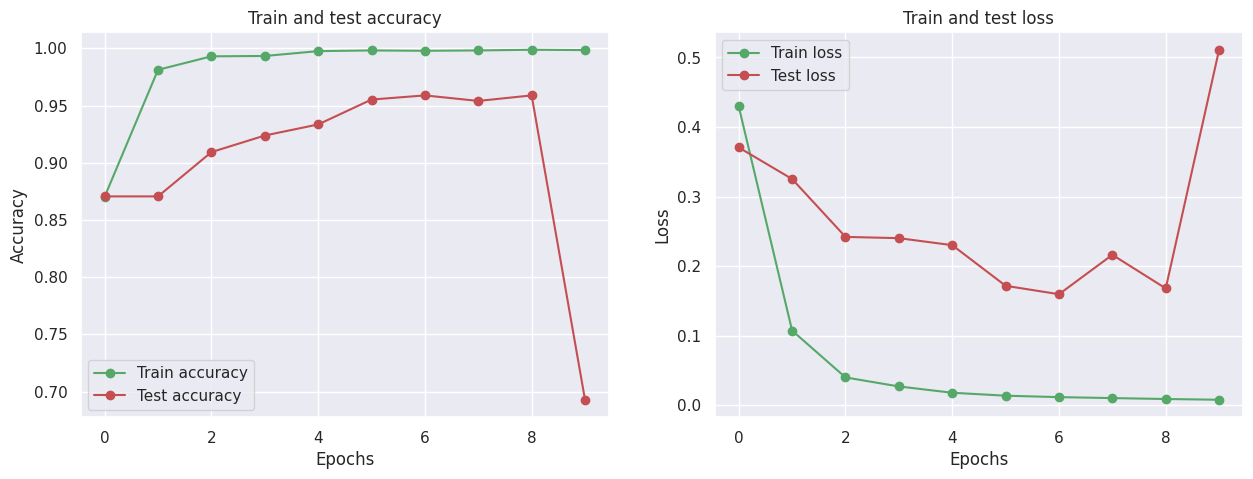

In [ ]:

epochs = [i for i in range(10)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(15, 5)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X=data[['Text']]
y=data['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Text
2228,kkwhere take test
5529,
2149,home
5058,next basic yoga course bugis pilate intro next tell time free
5051,vote wherever heart guide
...,...
4740,pizza want
474,want laid tonight want real dogging location sent direct join largest dogging network txting moan pmessagep
3266,want nokia colour phone deliveredtomorrow free minute mobile free text free camcorder reply call
4016,receiving week triple echo ringtone shortly enjoy


In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

In [ ]:
X_train_vect= pd.DataFrame(tfidf_train.toarray())
X_test_vect= pd.DataFrame(tfidf_test.toarray())
X_train_vect

,0,1,2,3,4,5,6,7,8,9,...,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Precision: 1.0 / Recall: 0.793 / F1-Score: 0.884 / Accuracy: 97.195%


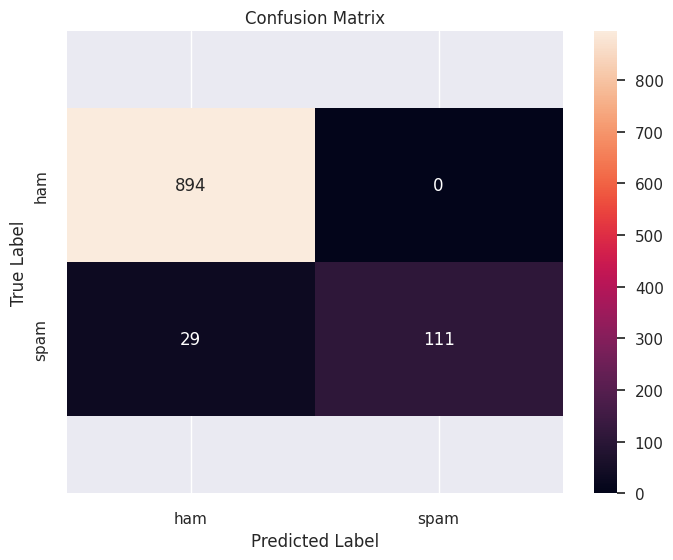

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

(5.5, -0.5)

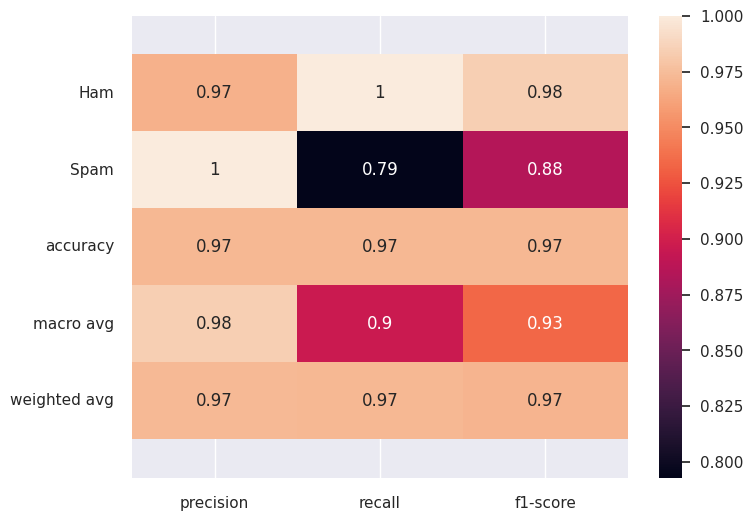

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       894
           1       1.00      0.79      0.88       140

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



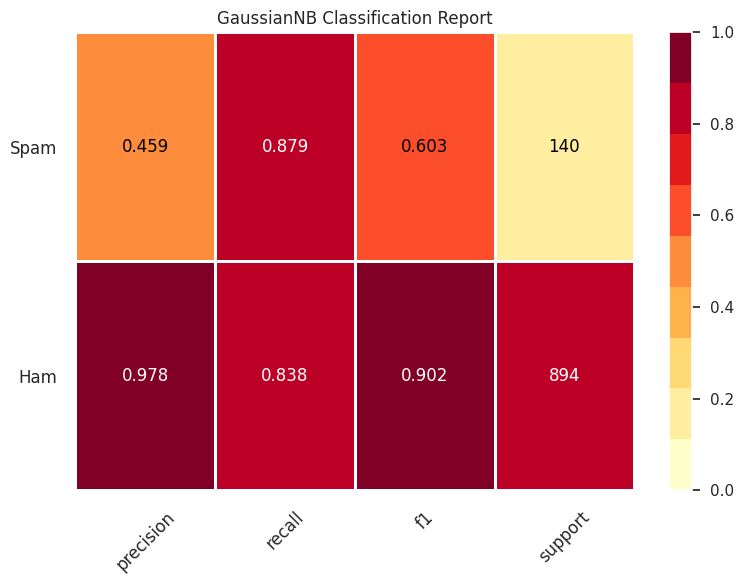

<Axes: title={'center': 'GaussianNB Classification Report'}>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classes = ["Ham", "Spam"]

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train_vect, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_vect, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
https://colab.research.google.com/drive/1ZkxiWaSSRSTZKrwQSW0duPI8H4g7Oc28?usp=sharing#scrollTo=rQse41q4whCb

In [ ]:
https://www.kaggle.com/code/eisgandar/spam-sms-detector-deep-learning-methods

https://www.kaggle.com/code/alisultanov/nlp-text-classification

https://github.com/Sk70249/NLP-Spam-Ham-Classifier/blob/master/NLP%20Spam-Ham%20Classifier.ipynb